In [7]:
#Importing Libraries
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import confusion_matrix, f1_score

Impoting Data

In [8]:
lab2_data = pd.read_csv('/Users/koonj/Desktop/AI:ML/AI:ML ALgo/Fall2023/Fall2023/practical_labs/datasets/Lab_2/Lab2_dataset.csv')

In [18]:
lab2_data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


# PART A

In [14]:
#Pre Prosessing

In [23]:
# use CountVectorizer to transform the "text" feature

# transform the data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lab2_data['text'])

# toarray() making
X_arr = X.toarray()

# splitting to training and testing
X_train, X_test, y_train, y_test = train_test_split(X_arr, \
                                                    lab2_data['label_num'], train_size= 0.6)

# Model training

In [24]:
# TRAINING CELL
model1 = SVC()
model1.fit(X_train, y_train)

model2 = MultinomialNB()
model2.fit(X_train, y_train)

model3 = GaussianNB()
model3.fit(X_train, y_train)

GaussianNB()

In [28]:
# Evaluation
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

conf1 = confusion_matrix(y_test, y_pred1)
conf2 = confusion_matrix(y_test, y_pred2)
conf3 = confusion_matrix(y_test, y_pred3)

# the count of true negatives is C_00, false negatives is C_10, 
# true positives C_11 is and false positives is C_01.
print(conf1)
print(conf2)
print(conf3)

[[1417   44]
 [  32  576]]
[[1441   20]
 [  32  576]]
[[1442   19]
 [  66  542]]


In [29]:
score1 = f1_score(y_test, y_pred1)
score2 = f1_score(y_test, y_pred2)
score3 = f1_score(y_test, y_pred3)

print(score1, score2, score3)

0.9381107491856677 0.9568106312292358 0.9272882805816938


In this model training and evaluation, three different classification models were trained on the given dataset: Support Vector Classifier (SVC), Multinomial Naive Bayes, and Gaussian Naive Bayes. After training, these models were evaluated using a test dataset, and their performance was assessed using confusion matrices and F1 scores.

The confusion matrices reveal how well each model classified the test data. Here are the key observations from the confusion matrices:

Support Vector Classifier (SVC):

True Negatives (C_00): 1417
False Negatives (C_10): 44
True Positives (C_11): 576
False Positives (C_01): 32
Multinomial Naive Bayes:

True Negatives (C_00): 1441
False Negatives (C_10): 20
True Positives (C_11): 576
False Positives (C_01): 32
Gaussian Naive Bayes:

True Negatives (C_00): 1442
False Negatives (C_10): 19
True Positives (C_11): 542
False Positives (C_01): 66
Additionally, the F1 scores for each model were calculated as follows:

SVC: 0.9381
Multinomial Naive Bayes: 0.9568
Gaussian Naive Bayes: 0.9273
The F1 score is a metric that combines precision and recall, providing a single value to assess the model's overall performance. Based on these results, the Multinomial Naive Bayes model achieved the highest F1 score, indicating better overall performance in terms of classifying the test data. However, the choice of the best model may also depend on other factors, such as the specific goals of the classification task and the nature of the data. Further analysis and consideration of these factors may be necessary to make a final model selection.

# Part B

In [39]:
AB_NYCData = pd.read_csv('/Users/koonj/Desktop/AI:ML/AI:ML ALgo/Fall2023/Fall2023/practical_labs/datasets/Lab_2/AB_NYC_2019.csv')

In [49]:
def remove_outliers(data, method='Z-score'):
    
    print('\n' + method + '\n')
    
    print('Shape of the Data before removing the outliers:', data.shape)
    
    if method == 'Z-score':
        # Removing Outliers using Z-score method with the standard 3 as threshold
        z_scores = np.abs(stats.zscore(data['price']))
        final_data = data[(z_scores < 3)]
        
    elif method == 'Whisker':
        # Using Whisker Method to remove the outliers 
        quantile1 = data['price'].quantile(0.25)
        quantile3 = data['price'].quantile(0.75)
        iqr = quantile3 - quantile1
        lower_range = quantile1 - 1.5 * iqr
        upper_range = quantile3 + 1.5 * iqr
        final_data = data[(data['price'] >= lower_range) & (data['price'] <= upper_range)]
        
    else:
        final_data = data
    
    print('Shape of the Data frame after removing outliers using the', method, 'method:', final_data.shape)
    print('The number of records deleted after removing outliers:', data.shape[0] - final_data.shape[0])
    
    
    return final_data

# Usage example:
# final_data = remove_outliers(AB_NYCData, method='Z-score')
# final_data = remove_outliers(AB_NYCData, method='Whisker')


In [52]:
AB_NYCData = pd.read_csv('/Users/koonj/Desktop/AI:ML/AI:ML ALgo/Fall2023/Fall2023/practical_labs/datasets/Lab_2/AB_NYC_2019.csv')

# Define the remove_outliers function as previously shown

methods = ['Z-score', 'Whisker']
for method in methods:
    final_data = remove_outliers(AB_NYCData, method)


Z-score

Shape of the Data before removing the outliers: (48895, 16)
Shape of the Data frame after removing outliers using the Z-score method: (48507, 16)
The number of records deleted after removing outliers: 388

Whisker

Shape of the Data before removing the outliers: (48895, 16)
Shape of the Data frame after removing outliers using the Whisker method: (45923, 16)
The number of records deleted after removing outliers: 2972


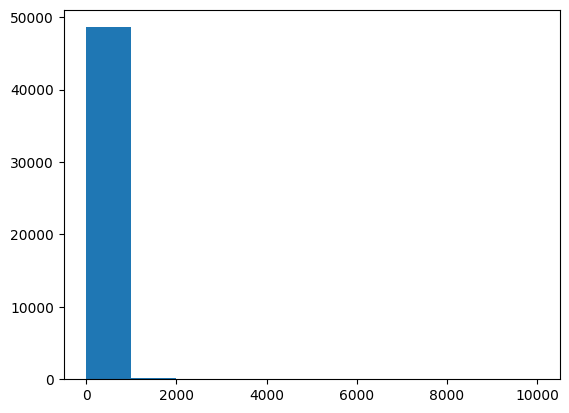

In [60]:
plt.hist(AB_NYCData['price'])
plt.show()

Here are the observations:

Using the Z-Score method resulted in the removal of approximately 388 records.
On the other hand, applying the Whisker method led to the removal of roughly 2,972 records.
